# FBA and pFBA Simulations

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime


This notebook performs flux balance analysis (FBA) and parsimonious FBA for R. opacus in glucose and phenol growth conditions and creates plots to compare the results with experimental data.

### Methods: 
<ol>
<li>Compare phenol 13CMFA fluxes to FBA and pFBA predictions: Scatter plots and flux maps</li>
<li>Compare glucose 13CMFA fluxes to FBA and pFBA predictions: Scatter plots and flux maps</li>
<li>Calculate FBA and pFBA growth rates for each of the experimental conditions</li>
<li>Plot growth rates in comparison to experimental data</li>
</ol>

#### The data uses the following mapping as introduced in Notebook E:

#### **Glucose**:
#### Yoneda transcriptomics data: 
* WT 1.0 g/L Glucose, 0.05g/L ammonium sulfate (**WT-LN-G**) (3 trials)

#### Combined with Rhiannon 2018 metabolomics and OD data:
* Metabolomics and OD data for WT Glucose (before **WT-G** but now **WT-LN-G**)

#### **Phenol**:
#### Henson data:
* WT 0.5 g/L Phenol (3 trials) (**WT-P**)
* PVHG6 0.5 g/L Phenol (3 trials) (**PVHG-P**)


##### **Import python packages**

In [1]:
import pandas as pd
import numpy as np
import cobra
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.cm as cm
import scipy
import sys
from scipy.stats import linregress
from sklearn.metrics import r2_score

##### **Load data from consumption and growth rate notebook (notebook E)**

In [2]:
consumption_and_growth_data = pd.read_csv('../consumption_and_growth_data/consumption_and_growth_data_new.csv', index_col=0)
consumption_and_growth_data

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785
WT-LN-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675


##### **Load Genome Scale Model**

In [3]:
model = cobra.io.read_sbml_model("../GSMs/Ropacus_annotated_curated.xml")

### **1. Phenol 13CMFA Comparison and Flux Maps**

##### **Load 13cdata**

#####  **Get 13C MFA measured fluxes for phenol**

In [4]:
phenol_fluxes = pd.read_csv('../13C_flux_data/13C_phenol_flux_data.csv')

# Remove rows that do not have a mapping to the GSM
phenol_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and FBA')

There are 43 fluxes that can be compared between the MFA and FBA


#### **WT-P and PVHG-P**

##### **Import SPOT and other utility functions code**

In [5]:
SourceDir = '../src'
sys.path.append(SourceDir)
from utils import *

In [6]:
fbasol =  FBA_pred(model, 'phenol') 

{'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000,
 'EX_phenol_e': 100}

In [7]:
pfbasol =  FBA_pred(model, 'phenol') 

{'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000,
 'EX_phenol_e': 100}

#### **Plot solutions: Comparison of FBA predictions and 13c measurements**

##### **Set plot output directory and import plot functions**

In [8]:
output_dir = 'Plots/'
from plot import *

##### **Add Phenol FBA and pFBA flux values to phenol fluxes dataframe**

##### **FBA**

In [9]:
phenol_fluxes = add_pred_fluxes_to_13c_df_without_std(phenol_fluxes, fbasol, 'FBA', 'WT')


##### **pFBA**

In [10]:
phenol_fluxes =  add_pred_fluxes_to_13c_df_without_std(phenol_fluxes, pfbasol, 'pFBA', 'WT')

##### **FBA**

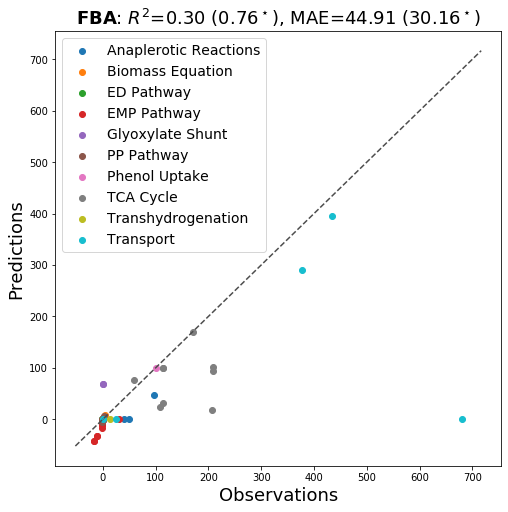

In [11]:
scatterplotcomp_obs_vs_pred(phenol_fluxes, substrate='phenol', method='FBA', strain='WT')

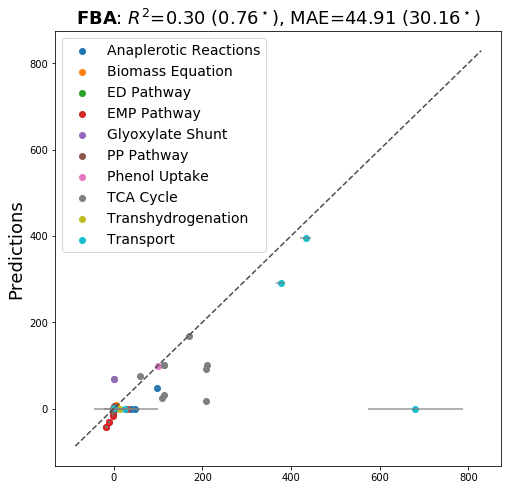

In [12]:
scatterplotcomp_obs_vs_pred_withstd(phenol_fluxes, substrate='phenol', method='FBA', strain='WT')

##### **pFBA**

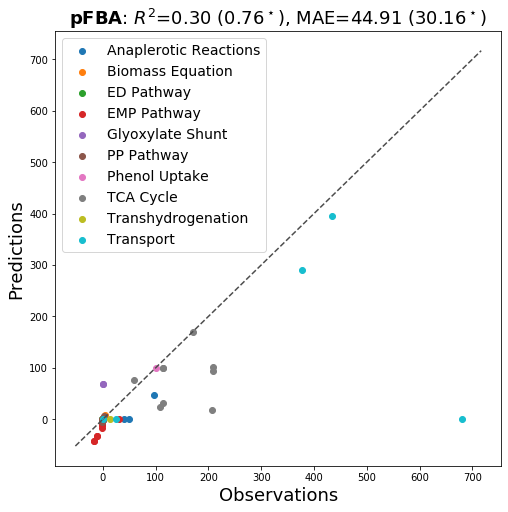

In [13]:
scatterplotcomp_obs_vs_pred(phenol_fluxes, substrate='phenol', method='pFBA', strain='WT')

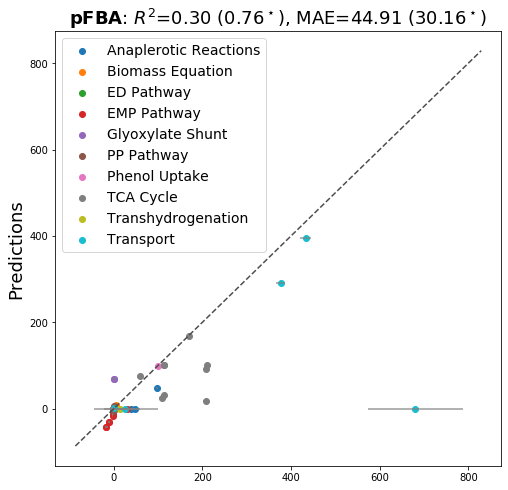

In [14]:
scatterplotcomp_obs_vs_pred_withstd(phenol_fluxes, substrate='phenol', method='pFBA', strain='WT')

### Map FBA Fluxes

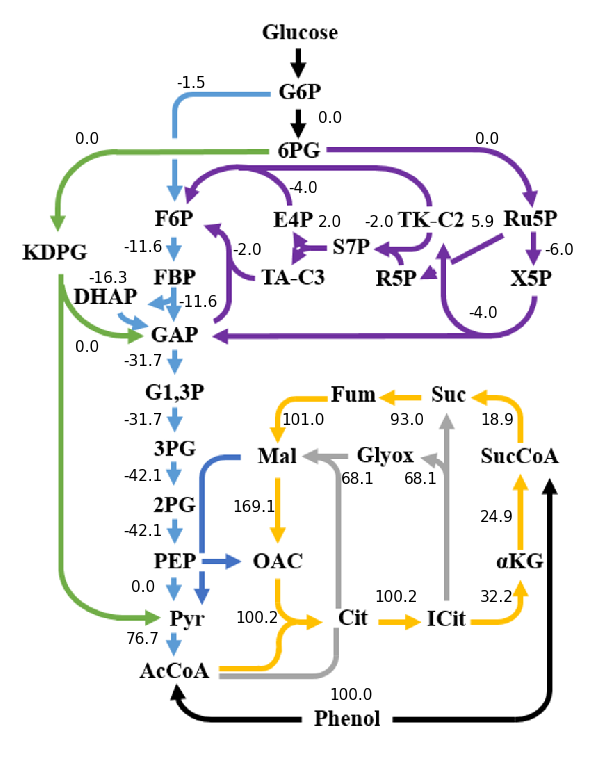

In [15]:
map_flux_results(phenol_fluxes, 'FBA WT Value')

### Map pFBA Fluxes

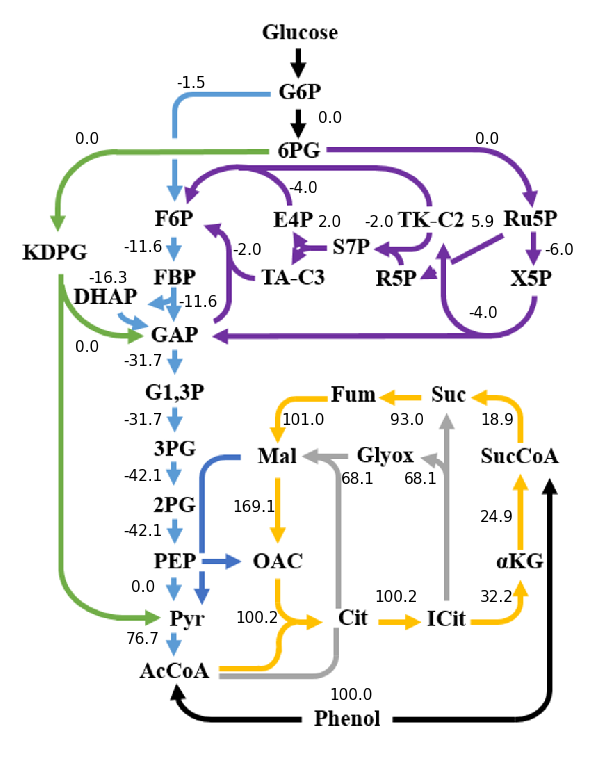

In [16]:
map_flux_results(phenol_fluxes, 'pFBA WT Value')

### Map 13C MFA Fluxes

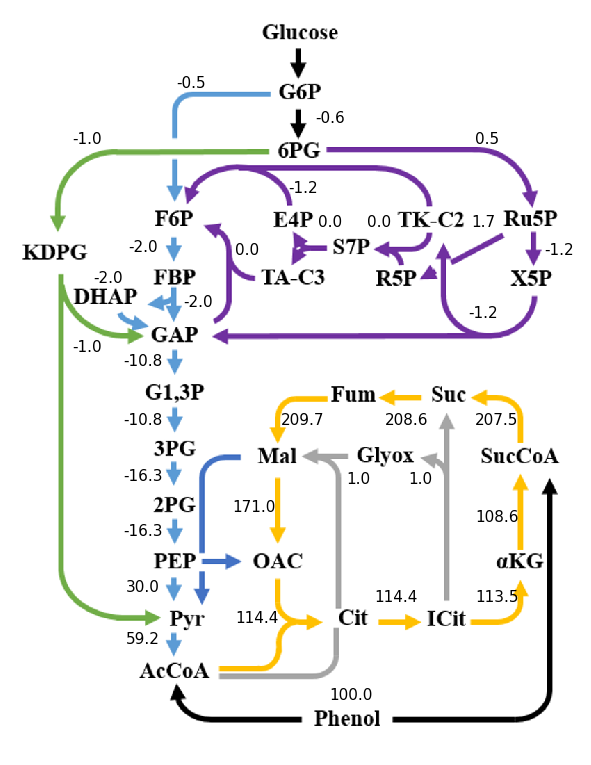

In [17]:
map_flux_results(phenol_fluxes, 'Flux')

##### **Save 13C MFA fluxes and FBA, pFBA predictions as csv file**

In [18]:
phenol_fluxes.to_csv('../13C_flux_data/13C_phenol_flux_and_FBA_pFBA_data.csv')

### **2. Glucose 13CMFA Comparison and Flux Maps**

#### **WT-LN-G**

##### **Load 13cdata**

#####  **Get 13C MFA measured fluxes for glucose**

In [19]:
glucose_fluxes = pd.read_csv('../13C_flux_data/13C_glucose_flux_data.csv')

# Remove rows that do not have a mapping to the GSM
glucose_fluxes.dropna(inplace=True)
print(f'There are {len(glucose_fluxes)} fluxes that can be compared between the MFA and FBA')

There are 31 fluxes that can be compared between the MFA and FBA


In [20]:
fbasol_glu =  FBA_pred(model, 'glucose') 

{'EX_glc__D_e': 100,
 'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000}

##### **Add Glucose FBA flux values to glucose_fluxes dataframe**

##### **FBA**

In [21]:
glucose_fluxes =  add_pred_fluxes_to_13c_df_without_std(glucose_fluxes, fbasol_glu, 'FBA', 'WT')

### Run glucose flux pFBA

In [22]:
pfbasol_glu =  pFBA_pred(model, 'glucose') 

{'EX_glc__D_e': 100,
 'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000}

### Add Glucose FBA flux values to glucose_fluxes dataframe

##### **pFBA**

In [23]:
glucose_fluxes =  add_pred_fluxes_to_13c_df_without_std(glucose_fluxes, pfbasol_glu, 'pFBA', 'WT')

### Plot FBA vs 13C MFA

##### **Write 13CMFA and predictions to file**

In [24]:
glucose_fluxes.to_csv('../13C_flux_data/13C_glucose_flux_and_FBA_pFBA_data.csv')

### Plot FBA, pFBA vs 13C MFA

##### **Plot 13CMFA vs. FBA predictions**

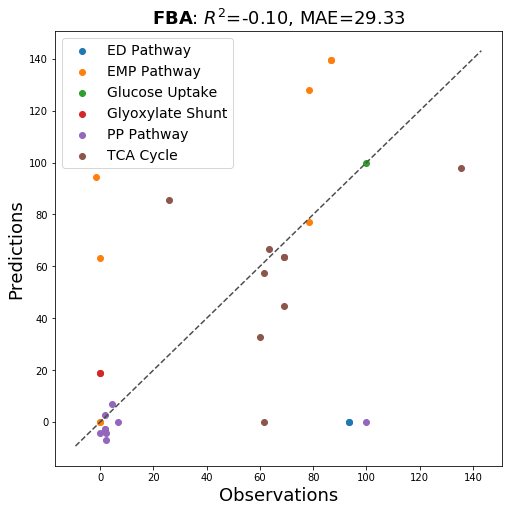

In [25]:
scatterplotcomp_obs_vs_pred(glucose_fluxes, substrate='glucose', method='FBA', strain='WT')

##### **Plot 13CMFA vs. FBA predictions with standard deviations**

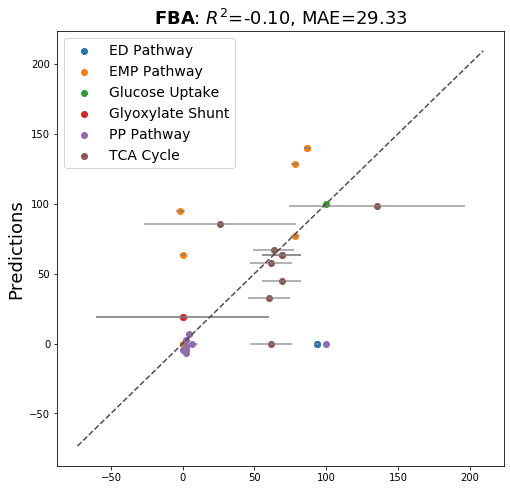

In [26]:
scatterplotcomp_obs_vs_pred_withstd(glucose_fluxes, substrate='glucose', method='FBA', strain='WT')

##### **Plot 13CMFA vs. FBA predictions**

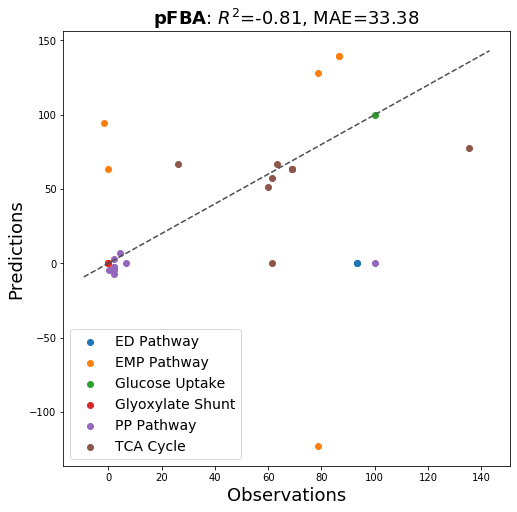

In [27]:
scatterplotcomp_obs_vs_pred(glucose_fluxes, substrate='glucose', method='pFBA', strain='WT')

##### **Plot 13CMFA vs. FBA predictions with standard deviations**

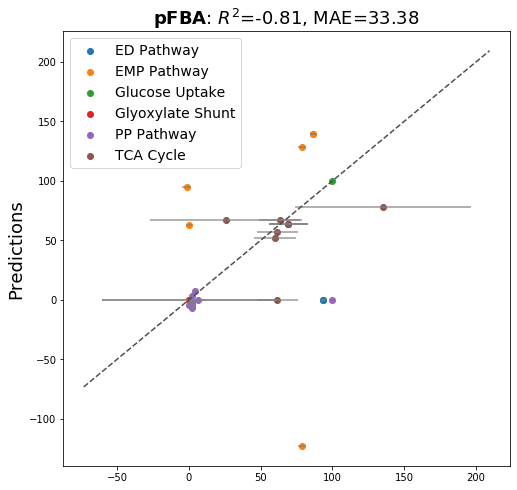

In [28]:
scatterplotcomp_obs_vs_pred_withstd(glucose_fluxes, substrate='glucose', method='pFBA', strain='WT')

#### **Map FBA Fluxes**

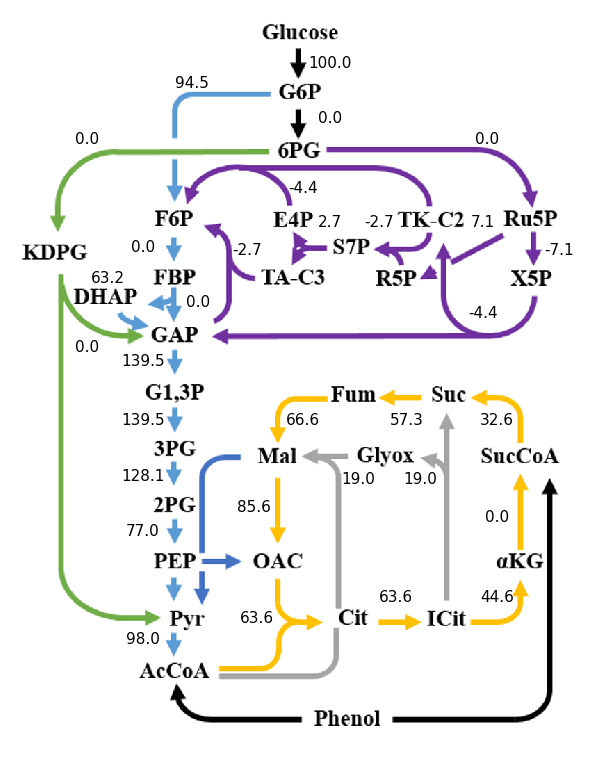

In [29]:
map_flux_results(glucose_fluxes, 'FBA WT Value')

#### **Map pFBA Fluxes**

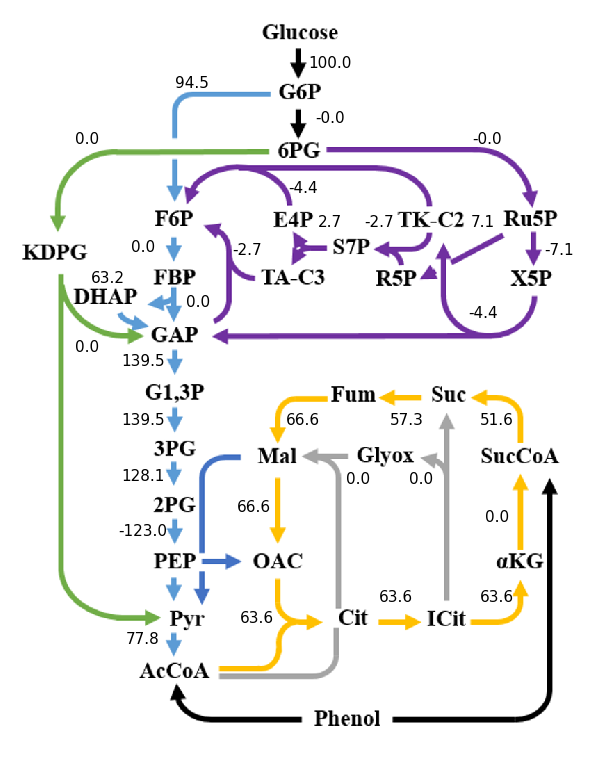

In [30]:
map_flux_results(glucose_fluxes, 'pFBA WT Value')

#### **Map 13C MFA Fluxes**

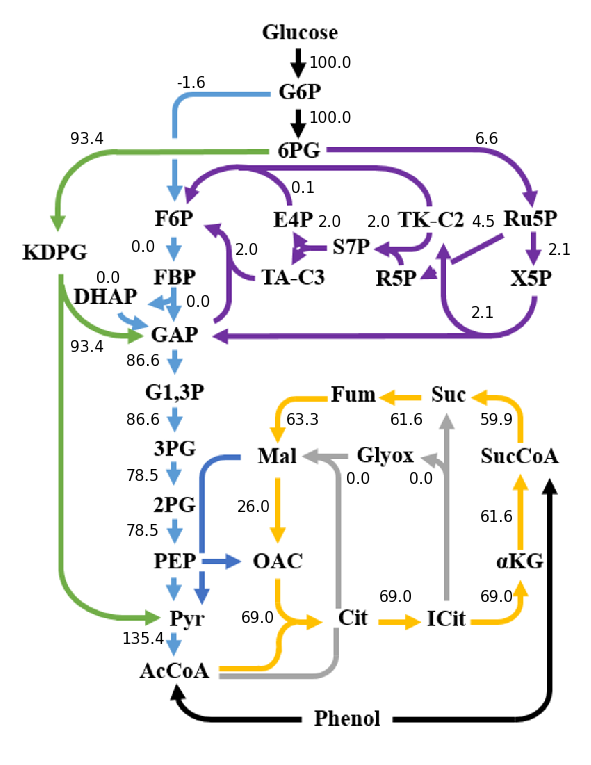

In [31]:
map_flux_results(glucose_fluxes, 'Flux')

### **3. Calculate growth rate predictions via FBA and pFBA**

In [32]:
consumption_and_growth_data['FBA_growth_rate']=pd.Series(np.zeros(len(consumption_and_growth_data['growth rate'])), index=consumption_and_growth_data.index)
consumption_and_growth_data['pFBA_growth_rate']=pd.Series(np.zeros(len(consumption_and_growth_data['growth rate'])), index=consumption_and_growth_data.index)
display(consumption_and_growth_data)

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,FBA_growth_rate,pFBA_growth_rate
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,0.0,0.0
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,0.0,0.0
WT-LN-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.0,0.0


##### Calculate FBA and pFBA growth rates and add to data frame

In [33]:
FBA_growth_rates = []
pFBA_growth_rates = []
for index in consumption_and_growth_data.index:
    sub_uptake_rate = consumption_and_growth_data.loc[index,'substrate consumption rate']
    if '-P' in str(index):
        substrate='phenol'
        growth = 'Growth_Phenol'
    elif '-G' in str(index):
        substrate='glucose'
        growth = 'Growth_Glucose'
    FBA_sol = FBA_pred(model, substrate, sub_uptake_rate)
    display(FBA_sol.fluxes['Growth_Glucose'])
    display(FBA_sol.fluxes[growth])
    FBA_growth_sol = FBA_sol.fluxes[growth]
    pFBA_sol = pFBA_pred(model, substrate, sub_uptake_rate)
    pFBA_growth_sol = pFBA_sol.fluxes[growth]
    
    FBA_growth_rates.append(FBA_growth_sol)
    pFBA_growth_rates.append(pFBA_growth_sol)
    
consumption_and_growth_data['FBA growth rate'] = FBA_growth_rates
consumption_and_growth_data['pFBA growth rate'] = pFBA_growth_rates
consumption_and_growth_data

{'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000,
 'EX_phenol_e': 1.3520722607432194}

0.0

0.12633790630146938

{'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000,
 'EX_phenol_e': 1.3520722607432194}

{'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000,
 'EX_phenol_e': 1.96748494522118}

0.0

0.1838421923708938

{'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000,
 'EX_phenol_e': 1.96748494522118}

{'EX_glc__D_e': 3.582470920816068,
 'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000}

0.43109119037136073

0.43109119037136073

{'EX_glc__D_e': 3.582470920816068,
 'EX_h2o_e': 1000,
 'EX_h_e': 1000,
 'EX_cl_e': 1000,
 'EX_pi_e': 1000,
 'EX_nh4_e': 1000,
 'EX_fe3_e': 1000,
 'EX_k_e': 1000,
 'EX_ca2_e': 1000,
 'EX_mg2_e': 1000,
 'EX_mn2_e': 1000,
 'EX_cobalt2_e': 1000,
 'EX_zn2_e': 1000,
 'EX_cu2_e': 1000,
 'EX_o2_e': 1000,
 'EX_fe2_e': 1000,
 'EX_mobd_e': 1000,
 'EX_so4_e': 1000}

,growth rate,yield coefficient,substrate consumption rate,growth rate std dev,yield coefficient std dev,substrate consumption rate std dev,FBA_growth_rate,pFBA_growth_rate,FBA growth rate,pFBA growth rate
WT-P,0.065488,0.048868,1.352072,0.001345,0.004836,0.122279,0.0,0.0,0.126338,0.126338
PVHG-P,0.080331,0.040848,1.967485,0.002672,0.001757,0.021785,0.0,0.0,0.183842,0.183842
WT-LN-G,0.260195,0.072789,3.582471,0.004749,0.004117,0.141675,0.0,0.0,0.431091,0.431091


dX/dt = mu*X

unit of substrate uptake rate = mmol substrate / (1 g biomass * hr)
units of biomass flux         = g biomass / (1 g biomass * hr) 
biomass flux = mu 

##### **Save growth rates as csv file**

In [34]:
consumption_and_growth_data.to_csv('../consumption_and_growth_data/consumption_and_growth_data_FBA_pFBA.csv', index=True, header= True)

### **4. Plot predicted vs measured growth rates**

##### **Define list to just select the indices that correspond to the data that we have transcripts available for**

In [35]:
selectedlist = ['WT-P', 'PVHG-P', 'WT-LN-G']

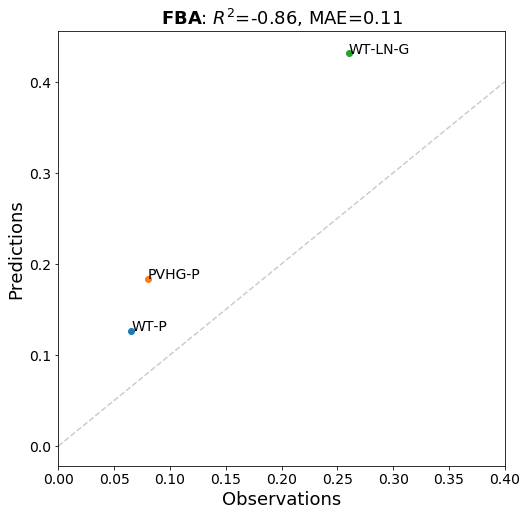

In [36]:
scatter_plot_compare(consumption_and_growth_data.loc[selectedlist, 'growth rate'], consumption_and_growth_data.loc[selectedlist, 'FBA growth rate'], selectedlist, 'FBA')

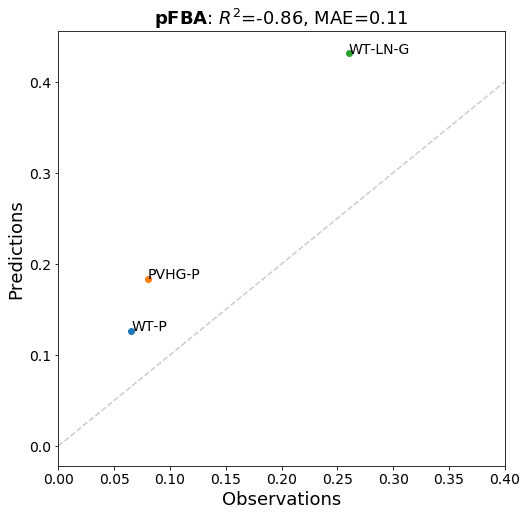

In [37]:
scatter_plot_compare(consumption_and_growth_data.loc[selectedlist, 'growth rate'], consumption_and_growth_data.loc[selectedlist, 'pFBA growth rate'], selectedlist, 'pFBA')